#### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
import statsmodels.api as sm # 쓰지는 않는다.
import sklearn as sk

#한글/차트 마이너스 없애기

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션 MNIST 데이터

#### 데이터 로드

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data 
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_scaled = train_input / 255.0 # 0~1 사이 실수값으로 변경

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [7]:
train_input.shape

(60000, 28, 28)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

- 손실곡선, 정확도

In [9]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
    
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))
    
    return model

In [10]:
# 함수의 사용 예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 2s - loss: 0.5195 - accuracy: 0.8136 - 2s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3828 - accuracy: 0.8621 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3526 - accuracy: 0.8720 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3380 - accuracy: 0.8782 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3299 - accuracy: 0.8834 - 2s/epoch - 1ms/step


In [12]:
history.history

{'loss': [0.5195369124412537,
  0.3828270137310028,
  0.35259106755256653,
  0.3380005955696106,
  0.3299286961555481],
 'accuracy': [0.8136041760444641,
  0.8621249794960022,
  0.8720208406448364,
  0.8782291412353516,
  0.8833541870117188]}

#### 손실 곡선 차트

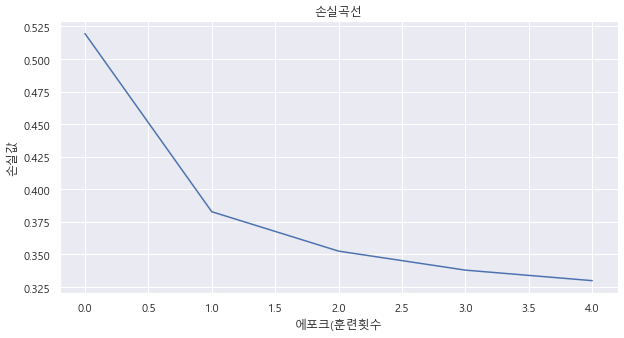

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수')
plt.ylabel('손실값')
plt.show()

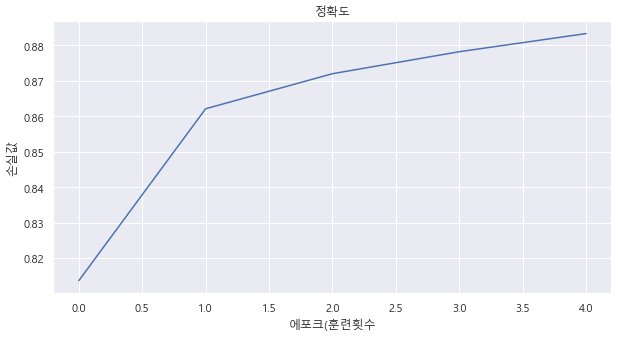

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수')
plt.ylabel('손실값')
plt.show()

#### 에포크 20번 훈련

In [15]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5277 - accuracy: 0.8136
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3924 - accuracy: 0.8595
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3555 - accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3325 - accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.8865
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.8909
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2999 - accuracy: 0.8945
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2867 - accuracy: 0.8995
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2826 - accuracy: 0.9020
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.276

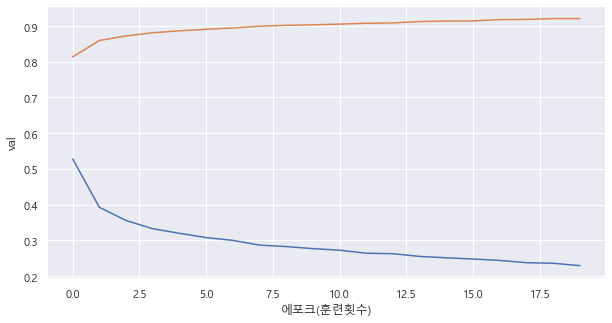

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5255 - accuracy: 0.8152 - val_loss: 0.4307 - val_accuracy: 0.8495
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3913 - accuracy: 0.8588 - val_loss: 0.4143 - val_accuracy: 0.8493
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3541 - accuracy: 0.8722 - val_loss: 0.3629 - val_accuracy: 0.8719
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8801 - val_loss: 0.3622 - val_accuracy: 0.8751
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8869 - val_loss: 0.3811 - val_accuracy: 0.8715
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3080 - accuracy: 0.8912 - val_loss: 0.4071 - val_accuracy: 0.8629
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8946 - val_loss: 0.3756 - val_accuracy:

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

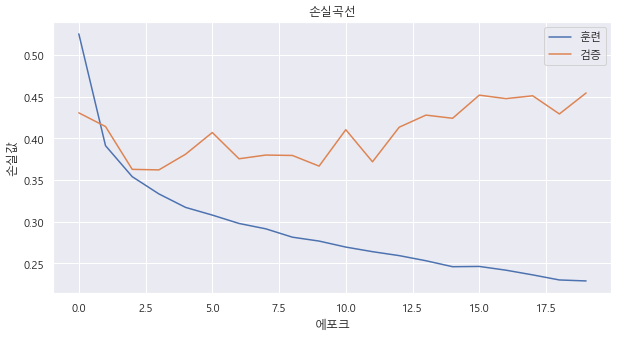

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5944 - accuracy: 0.7931 - val_loss: 0.4313 - val_accuracy: 0.8467
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4514 - accuracy: 0.8417 - val_loss: 0.3967 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4214 - accuracy: 0.8539 - val_loss: 0.3963 - val_accuracy: 0.8599
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4112 - accuracy: 0.8579 - val_loss: 0.4006 - val_accuracy: 0.8614
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4034 - accuracy: 0.8609 - val_loss: 0.3821 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3984 - accuracy: 0.8663 - val_loss: 0.3965 - val_accuracy: 0.8664
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3946 - accuracy: 0.8673 - val_loss: 0.3762 - val_accuracy:

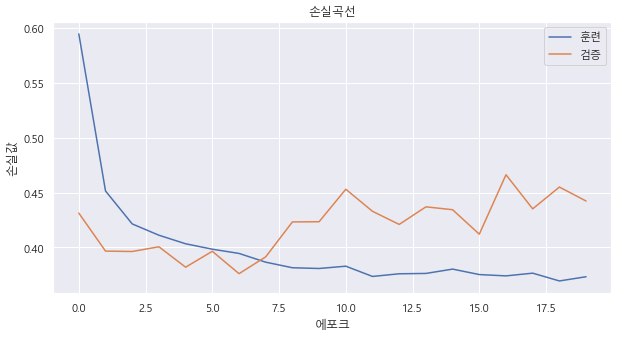

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [23]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3688 - accuracy: 0.8726 - val_loss: 0.4068 - val_accuracy: 0.8763
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3497 - accuracy: 0.8765 - val_loss: 0.3929 - val_accuracy: 0.8766
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8767 - val_loss: 0.3846 - val_accuracy: 0.8768
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3227 - accuracy: 0.8814 - val_loss: 0.3804 - val_accuracy: 0.8767
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.8824 - val_loss: 0.3794 - val_accuracy: 0.8748
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8866 - val_loss: 0.3708 - val_accuracy: 0.8759
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3071 - accuracy: 0.8864 - val_loss: 0.3777 - val_accuracy:

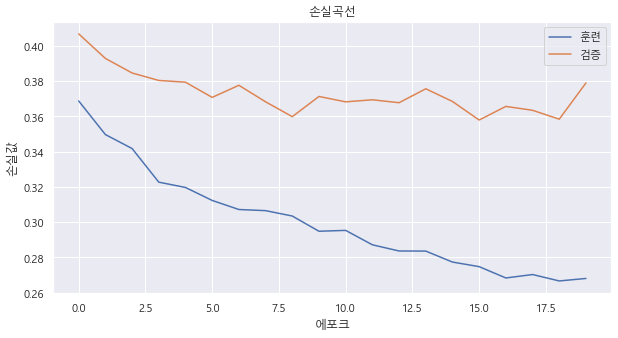

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 모델 저장/ 로드

In [26]:
# 훈련된 가중치만 저장
model.save_weights('./data/model_weights.h5')

In [27]:
# 훈련된 전체 데이터 저장
model.save('./data/model.h5')

#### 가중치 모델 로드

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model_weights.h5')

In [29]:
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

#### 전체 모델 로드

In [30]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3790 - accuracy: 0.8783


[0.3789950907230377, 0.878333330154419]

가중치만 저장하면 모델 기능에 제약이 있다. 그래서 모델 전체 데이터를 저장하면 모든 기능을 수행 할 수 있다.

In [31]:
model.predict(val_scaled)

375/375 [==============================] - 1s 1ms/step


array([[1.55196647e-28, 0.00000000e+00, 0.00000000e+00, ...,
        1.25781259e-22, 1.00000000e+00, 2.23649739e-33],
       [2.30322787e-13, 8.01409510e-33, 9.91791069e-22, ...,
        3.53316947e-23, 1.00000000e+00, 1.35983571e-18],
       [3.45753576e-36, 0.00000000e+00, 0.00000000e+00, ...,
        9.99958634e-01, 5.06948624e-20, 1.59833612e-17],
       ...,
       [6.28280705e-10, 4.85209883e-28, 1.95271971e-16, ...,
        1.01257085e-16, 9.99999881e-01, 1.01472623e-13],
       [2.27258402e-18, 0.00000000e+00, 5.09807523e-25, ...,
        5.59177335e-26, 1.00000000e+00, 3.00637321e-23],
       [2.96498481e-02, 5.29452177e-11, 4.01663874e-06, ...,
        1.91621985e-09, 7.17483095e-09, 8.77878256e-03]], dtype=float32)

### 예측결과

In [33]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.8783333333333333

In [36]:
val_labels

array([8, 8, 7, ..., 8, 8, 3], dtype=int64)

콜백 CallBack

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5897 - accuracy: 0.7937 - val_loss: 0.4373 - val_accuracy: 0.8378
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4410 - accuracy: 0.8420 - val_loss: 0.3811 - val_accuracy: 0.8577
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4050 - accuracy: 0.8537 - val_loss: 0.3731 - val_accuracy: 0.8618
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8589 - val_loss: 0.3611 - val_accuracy: 0.8698
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8645 - val_loss: 0.3651 - val_accuracy: 0.8641
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3529 - accuracy: 0.8705 - val_loss: 0.3469 - val_accuracy: 0.8725
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8735 - val_loss: 0.3374 - val_accuracy:

In [38]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3197 - accuracy: 0.8853


[0.31973105669021606, 0.8853333592414856]

#### 조기종료

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 가장 좋은 모델 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1479/1500 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.7912
Epoch 1: val_loss improved from inf to 0.43950, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5931 - accuracy: 0.7917 - val_loss: 0.4395 - val_accuracy: 0.8393
Epoch 2/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.4409 - accuracy: 0.8415
Epoch 2: val_loss improved from 0.43950 to 0.38645, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8415 - val_loss: 0.3865 - val_accuracy: 0.8572
Epoch 3/20
1476/1500 [============================>.] - ETA: 0s - loss: 0.4043 - accuracy: 0.8519
Epoch 3: val_loss improved from 0.38645 to 0.36678, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4040 - accuracy: 0.8521 - val_loss: 0.3668 - val_accuracy: 0.8654
Epoch 4/20
1490/1500 [===================

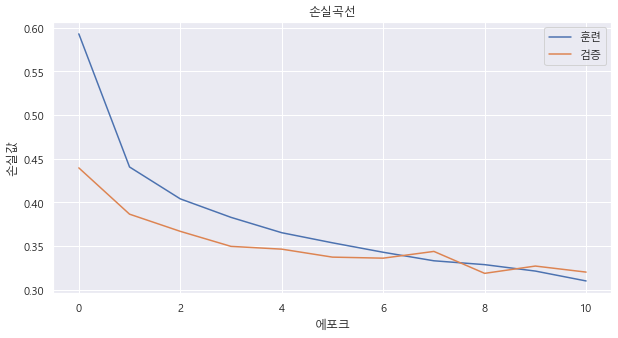

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [63]:
# 어느 에포크에서 조기 종료했는지 확인
early_stopping_cb.stopped_epoch # 10번째에서 멈춤(드랍아웃)

10

In [64]:
model.evaluate(val_scaled, val_target) # 9번쨰 에포크 값

375/375 [==============================] - 1s 1ms/step - loss: 0.3186 - accuracy: 0.8796


[0.31863558292388916, 0.8795833587646484]

In [65]:
# 최종값 저장
model.save('./data/best_model_epoch.h5')

In [66]:
model = keras.models.load_model('./data/best_model.h5') # earlystopping 콜백된 모델
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8824


[0.322767972946167, 0.8824166655540466]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [67]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8796


[0.31863558292388916, 0.8795833587646484]

In [68]:
### 예측 결과
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)